In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import os.path as osp
from IPython.display import display, HTML

%matplotlib inline

# Ingest MovieLens data

https://grouplens.org/datasets/movielens/ see under "Recommended for education and development"

Data download link: http://files.grouplens.org/datasets/movielens/ml-latest.zip

In [10]:
def files_with_extension_in(dirname, extension):
    for f in filter(lambda x: x.lower().endswith(extension), os.listdir(dirname)):
        yield osp.join(dirname, f)

In [11]:
DFs = {}
print('MovieLens data')
for f in files_with_extension_in('ml-latest', '.csv'):
    DFs[f] = pd.read_csv(f)
    print(f)
    display(HTML(DFs[f].head(n=3).to_html()))
    print('========================================\n\n')

MovieLens data
ml-latest\genome-scores.csv


,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900




ml-latest\genome-tags.csv


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century




ml-latest\links.csv


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0




ml-latest\movies.csv


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance




ml-latest\ratings.csv


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523




ml-latest\tags.csv


,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834


In [72]:
mlmeta = DFs['ml-latest\movies.csv']
mlmeta.head(n=3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [73]:
len(mlmeta)

45843

# Ingest Kaggle "The Movies Dataset"

Kaggle project link: https://www.kaggle.com/rounakbanik/the-movies-dataset/data

Data download: https://www.kaggle.com/rounakbanik/the-movies-dataset/downloads/the-movies-dataset.zip

In [28]:
KAG = {}
for f in files_with_extension_in('the-movies-dataset', '.csv'):
    KAG[f] = pd.read_csv(f)
    print(f)
    display(HTML(KAG[f].head(n=3).to_html()))
    print('========================================\n\n')

the-movies-dataset\credits.csv


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602




the-movies-dataset\keywords.csv


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."




the-movies-dataset\links.csv


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0




the-movies-dataset\links_small.csv


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0




the-movies-dataset\movies_metadata.csv


C:\Users\Matt\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0




the-movies-dataset\ratings_small.csv


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


# Explore movie metadata

In [29]:
meta = KAG['the-movies-dataset\movies_metadata.csv']
meta.head(n=3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [75]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [74]:
len(meta)

45466

In [30]:
def to_numeric(x):
    try:
        return float(x)
    except:
        print('cannot cast to float: {:s}'.format(x))
    return 0.0

meta['budget'].map(to_numeric).head(n=3)

cannot cast to float: /ff9qCepilowshEtG2GYWwzt2bs4.jpg
cannot cast to float: /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
cannot cast to float: /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


0    30000000.0
1    65000000.0
2           0.0
Name: budget, dtype: float64

### Limit to commercial movies. We don't know whether the 0 is due to lack of data or to the movie really having a $0 budget.

In [31]:
meta['budget'] = meta['budget'].map(to_numeric)

cannot cast to float: /ff9qCepilowshEtG2GYWwzt2bs4.jpg
cannot cast to float: /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
cannot cast to float: /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [52]:
meta['revenue'] = meta['revenue'].map(to_numeric)

In [53]:
commercial = meta.query('budget > 0 and revenue > 0')

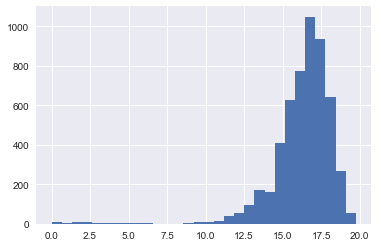

In [54]:
np.log(commercial['budget']).hist(bins=30)

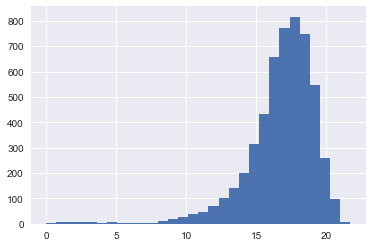

In [55]:
np.log(commercial['revenue']).hist(bins=30)

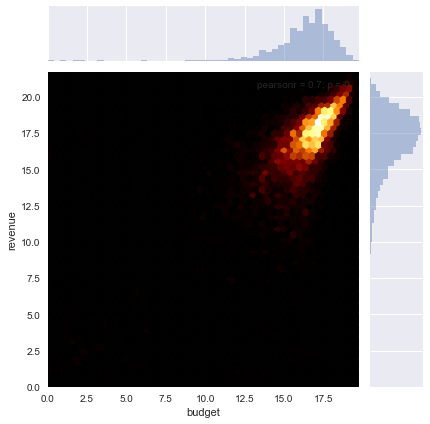

In [70]:
sns.jointplot('budget','revenue', data=np.log(commercial[['budget','revenue']]), kind='hex', cmap='afmhot')

In [71]:
len(commercial)

5381

# Credits?

In [76]:
credits = KAG['the-movies-dataset\credits.csv']

In [87]:
credits['crew']

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
5        [{'credit_id': '52fe4292c3a36847f802916d', 'de...
6        [{'credit_id': '52fe44959251416c75039da9', 'de...
7        [{'credit_id': '52fe46bdc3a36847f810f797', 'de...
8        [{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...
9        [{'credit_id': '52fe426ec3a36847f801e14b', 'de...
10       [{'credit_id': '52fe44dac3a36847f80adfa3', 'de...
11       [{'credit_id': '52fe44b79251416c7503e7fb', 'de...
12       [{'credit_id': '593f24b9c3a3680369002371', 'de...
13       [{'credit_id': '52fe43c59251416c7501d6f3', 'de...
14       [{'credit_id': '52fe42f4c3a36847f802f69f', 'de...
15       [{'credit_id': '52fe424dc3a36847f80139cd', 'de...
16       [{'credit_id': '52fe43cec3a36847f807101f', 'de.